In [1]:
import numpy as np
import dlsfunctions as dls
import initialization_data as init
import matplotlib.pyplot as plt

In [2]:
# generates unequal-amplitude bimodal distribution
def generate_bimodal_distribution(d, mean1, sigma1, mean2, sigma2, mie_fract):
    f1 = 1/(sigma1*np.sqrt(2*np.pi**2))*np.exp(-(d-mean1)**2/(2*sigma1**2))
    f1 = f1* dls.normalize(f1, 1, d[1] - d[0])
    
    f2 = 1/(sigma2*np.sqrt(2*np.pi**2))*np.exp(-(d-mean2)**2/(2*sigma2**2))
    f2 = f2 * dls.normalize(f2, 1, d[1] - d[0])
    
    f = f1 + 2*f2
    f = f * dls.normalize(f, 1, d[1] - d[0])
    return f

In [22]:
d = init.get_distance()

mean1 = init.get_left_mean()
sigma1 = init.get_narrow_sigma()

mean2 = init.get_right_mean()
sigma2 = init.get_narrow_sigma()

c = init.c
m = init.m
beta = init.beta

f = generate_bimodal_distribution(d, mean1, sigma1, mean2, sigma2, c)

time = init.get_log_time()
gamma = init.get_gamma()

noise = np.random.normal(mean1, sigma1, 200)*5e7

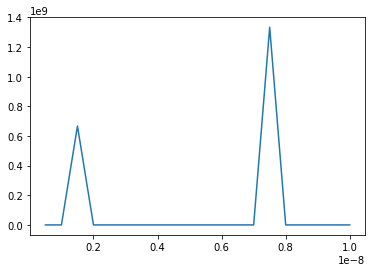

In [23]:
plt.plot(d,f)

In [24]:
dls.check_distribution_norm(f, d[1] - d[0])

1.0

In [25]:
theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time) + noise

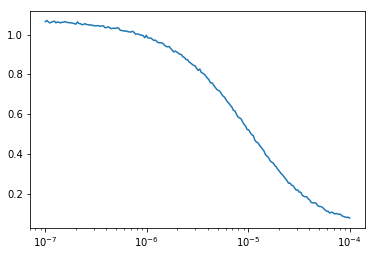

In [26]:
plt.semilogx(time, sim_data)

In [27]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [28]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.369, 0.387, 0.349, 0.382, 0.361, 0.369, 0.391, 0.386, 0.356,
       0.358, 0.357, 0.369, 0.363, 0.364, 0.361, 0.339, 0.35 , 0.387,
       0.383, 0.339, 0.365, 0.362, 0.37 , 0.342, 0.359, 0.391, 0.376,
       0.355, 0.372, 0.37 , 0.362, 0.369, 0.343, 0.354, 0.386, 0.362,
       0.405, 0.364, 0.361, 0.387, 0.368, 0.354, 0.351, 0.35 , 0.37 ,
       0.352, 0.378, 0.367, 0.391, 0.36 , 0.349, 0.338, 0.374, 0.388,
       0.366, 0.38 , 0.371, 0.35 , 0.346, 0.356, 0.354, 0.366, 0.358,
       0.341, 0.38 , 0.331, 0.341, 0.381, 0.389, 0.364, 0.378, 0.366,
       0.377, 0.346, 0.379, 0.348, 0.351, 0.356, 0.366, 0.351, 0.367,
       0.393, 0.336, 0.386, 0.395, 0.349, 0.394, 0.357, 0.39 , 0.377,
       0.342, 0.388, 0.376, 0.348, 0.351, 0.382, 0.338, 0.36 , 0.375,
       0.361])

In [29]:
chained_sampler = dls.chain(result, 850, ndim)
samples_df = dls.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,2.528529e+07,1.409708e+07,3.111625e+07,8.218741e+06,3.842731e+07,5.364228e+07,1.352951e+09,3.148342e+07,810218.113554,1.882111e+07,6.257719e+06,3.289120e+07,6.700169e+08,7.760238e+07,1.772881e+07,1.220940e+07,2.139727e+07,2.283382e+07,1.894625e+06,4.404176e+07


In [30]:
infer = np.zeros(20)
infer[0] = 2.528529e+07
infer[1] = 1.409708e+07
infer[2] = 6.700169e+08
infer[3] = 7.760238e+07
infer[4] = 1.772881e+07
infer[5] = 1.220940e+07
infer[6] = 2.139727e+07
infer[7] = 2.283382e+07
infer[8] = 1.894625e+06
infer[9] = 4.404176e+07
infer[10] = 3.111625e+07
infer[11] = 8.218741e+06
infer[12] = 3.842731e+07
infer[13] = 5.364228e+07
infer[14] = 1.352951e+09
infer[15] = 3.148342e+07
infer[16] = 810218.113554
infer[17] = 1.882111e+07
infer[18] = 6.257719e+06
infer[19] = 3.289120e+07

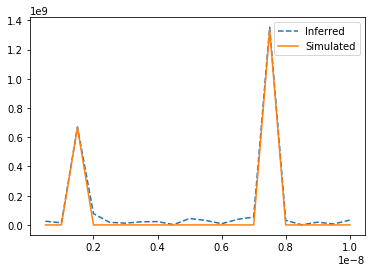

In [35]:
plt.plot(d, infer, '--', label='Inferred')
plt.plot(d, f, label='Simulated')
plt.legend()

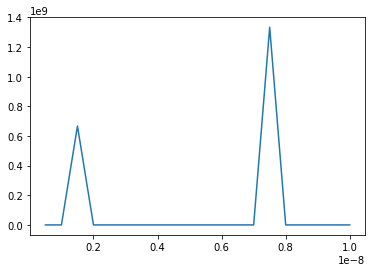

In [16]:
plt.plot(d, f)

In [32]:
beta_post = dls.get_beta(chained_sampler, ndim)
betaq = beta_post.quantile([0.5], axis=0)
betaq

,beta
0.5,1.141112


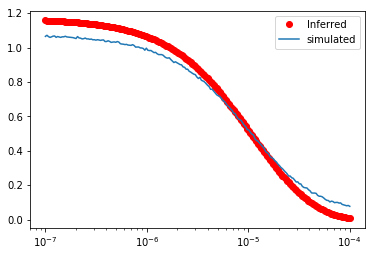

In [33]:
theta_infer = np.append(infer, 1.14112)
inferg2 = dls.g2(theta_infer, d, m, gamma, time)

plt.semilogx(time, inferg2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='simulated')
plt.legend()

(array([ 400.,  542., 1022., 1454., 1953., 3184., 3127., 1764., 1033.,
         521.]),
 array([4.65425429e-04, 1.99919985e-01, 3.99374546e-01, 5.98829106e-01,
        7.98283666e-01, 9.97738226e-01, 1.19719279e+00, 1.39664735e+00,
        1.59610191e+00, 1.79555647e+00, 1.99501103e+00]),
 <a list of 10 Patch objects>)

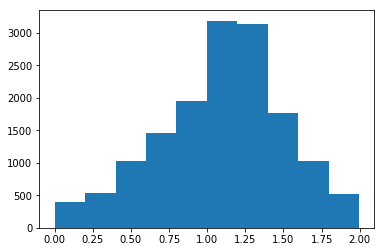

In [34]:
beta_posterior = beta_post.values.flatten()
plt.hist(beta_posterior)